<a href="https://colab.research.google.com/github/SeeUSoon93/deepLearning/blob/main/ex08_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 이미지 분석에 뛰어난 cnn 모델을 활용하여 손글씨 데이터셋 학습 및 분류 하기
- MLP와 CNN의 차이점 확인
- 실제 손글씨 데이터 넣어 정확도 확인

In [ ]:
# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
# 훈련데이터 1000개, 테스트데이터 300개만 가져와서 학습및 평가
X_train = X_train[:1000,:]
y_train = y_train[:1000]

X_test = X_test[:300,:]
y_test = y_test[:300]

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1000, 28, 28) (1000,)
(300, 28, 28) (300,)


In [ ]:
# 색상차원 추가해주기
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255

In [ ]:
# CNN 모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# Conv2D : 이미지에서 특성을 추출하는 기능
# MaXpool2D : 특징이 아닌 부분을 제거, 이미지의 크기를 줄여주는 기능
# Dense : 데이터 분석
# Flatten : 다차원의 데이터를 1차원으로 변환해줌

In [ ]:
# 뼈대
model = Sequential()

# 특성 추출부
model.add(Conv2D(filters = 32, # 찾을 특징의 개수를 작성
                 kernel_size = (3,3), # 특징을 추출할 크기 (3px*3px)
                 input_shape = (28,28,1), # 첫번째 conv 층에서만 작성
                 padding = 'same', activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2))) # 특징이 아닌부분 삭제~

# 분석 전에
# 특성추출기와 분석기를 연결해주기 위해서 1차원 데이터로 변환
model.add(Flatten())
# 분석기 (Dense)
model.add(Dense(units=128,activation='relu'))

# 출력층
model.add(Dense(units=10))

In [ ]:
# 학습방법 및 평가방법 설정
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델저장 객체 생성
# 모델 저장 경로 설정
model_path='/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/cnn_best_model/cnn_best_model_{epoch:02d}_{val_accuracy:0.2f}.hdf5'
cp = ModelCheckpoint(filepath = model_path,
                     verboase = 1, # 로그 출력 > 학습기록
                     save_best_only = True,
                     # 모델이 최고성능을 도달할 때만 저장
                     monitor = 'val_accuracy')

In [ ]:
# 조기학습 중단 객체 생성
early = EarlyStopping(monitor = 'val_accuracy',
                      verbose = 1,
                      patience = 10) # 모델성능의 개선을 기다려주는 횟수

In [ ]:
h3 = model.fit(X_train, y_train, validation_split = 0.2, epochs = 1000, batch_size = 50,
                callbacks = [cp, early])

Epoch 1/1000
16/16 [==============================] - 1s 20ms/step - loss: 4.0623 - accuracy: 0.2075 - val_loss: 2.2335 - val_accuracy: 0.2250
Epoch 2/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.3026 - accuracy: 0.2225 - val_loss: 2.3026 - val_accuracy: 0.2300
Epoch 3/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.3026 - accuracy: 0.2025 - val_loss: 2.3026 - val_accuracy: 0.2400
Epoch 4/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.2000 - val_loss: 2.3026 - val_accuracy: 0.2400
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.2013 - val_loss: 2.3026 - val_accuracy: 0.2400
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.2013 - val_loss: 2.3026 - val_accuracy: 0.2400
Epoch 7/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.2013 - val_loss: 2.3026 - val_accuracy: 0.2400
Epoc

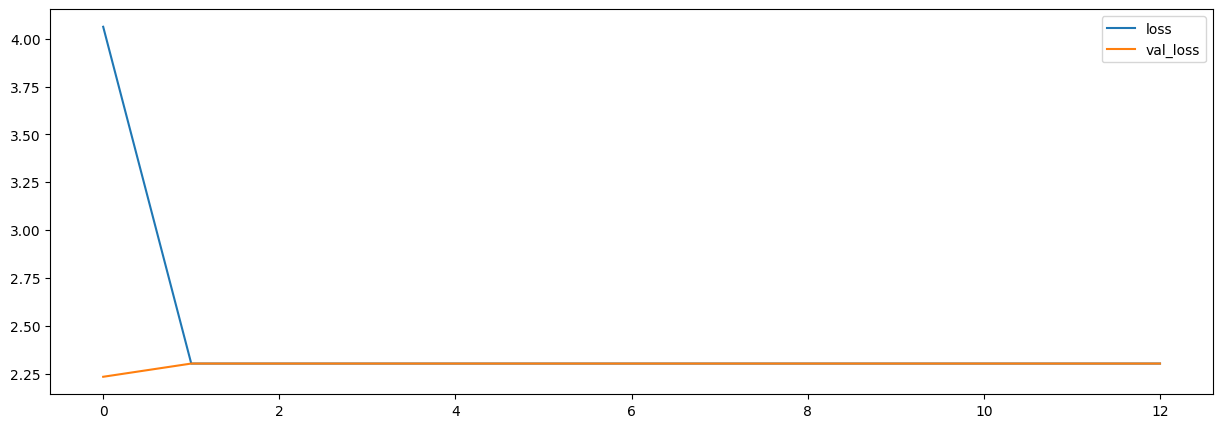

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h3.history['loss'], label='loss')
plt.plot(h3.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
### best_model 불러오는 방법
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/cnn_best_model/cnn_best_model_03_0.24.hdf5')

In [ ]:
# 파이썬 이미지처리 라이브러리
import PIL.Image as pimg

img = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/손글씨/손글씨02.png').convert('L')
# convert('L'): 컬러이미지를 흑백으로 변환
img = np.array(img)
test_img = img.reshape(1,28,28,1)
test_img = test_img.astype('float32')/255

In [ ]:
best_model.predict(test_img)

1/1 [==============================] - 0s 59ms/step


array([[-0.77465624, -0.5728474 , -0.6274883 , -2.499635  , -1.4860504 ,
        -2.644932  , -2.0057507 , -0.41538393, -0.8370768 , -1.7893643 ]],
      dtype=float32)